In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

/home/leonardoishii/Documentos/python/acoes/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def dataprep_cotahist(df):
    col = df.columns[0]
    df['tipo'] = df[col].str[:2].str.replace(' ', '')
    df['ano'] = df[col].str[2:6].str.replace(' ', '')
    df['mes'] = df[col].str[6:8].str.replace(' ', '')
    df['dia'] = df[col].str[8:10].str.replace(' ', '')
    df['data'] = df[col].str[2:10].str.replace(' ', '')
    df['coddbi'] = df[col].str[10:12].str.replace(' ', '')
    df['codneg'] = df[col].str[12:24].str.replace(' ', '')
    df['tpmerc'] = df[col].str[24:27].str.replace(' ', '')
    df['nomres'] = df[col].str[27:39].str.replace(' ', '')
    df['especi'] = df[col].str[39:49].str.replace(' ', '')
    df['prazot'] = df[col].str[49:52].str.replace(' ', '')
    df['modref'] = df[col].str[52:56].str.replace(' ', '')
    df['preabe'] = df[col].str[56:69].astype(float)/100
    df['premax'] = df[col].str[69:82].astype(float)/100
    df['premin'] = df[col].str[82:95].astype(float)/100
    df['premed'] = df[col].str[95:108].astype(float)/100
    df['preult'] = df[col].str[108:121].astype(float)/100
    df['preofc'] = df[col].str[121:134].astype(float)/100
    df['preofv'] = df[col].str[134:147].astype(float)/100
    df['totneg'] = df[col].str[147:152].astype(int)
    df['quatot'] = df[col].str[152:170].astype(int)
    df['voltot'] = df[col].str[170:188].astype(float)/100
    df['preexe'] = df[col].str[188:201].astype(float)/100
    df['indopc'] = df[col].str[201].str.replace(' ', '')
    df['datven'] = df[col].str[202:210].str.replace(' ', '')
    df['fatcot'] = df[col].str[210:217].str.replace(' ', '')
    df['ptoexe'] = df[col].str[217:230].astype(float)/100
    df['codisi'] = df[col].str[230:242].str.replace(' ', '')
    df['dismes'] = df[col].str[242:245].str.replace(' ', '')
    return df.drop([col], axis=1)

In [3]:
## Ações para analisar

acoes = ['PETR4F', 'VALE3F', 'ITUB4F', 'BBDC4F', 'ABEV3F', 'PETR3F', 'B3SA3F', 'ITSA4F', 'SMAL11F',
        'MGLU3F', 'BRFS3', 'FIBR3F', 'RENT3F', 'CMIG4F', 'BOVA11F', 'IVVB11F', 'GGBR4F', 'BPAC11F',
         'VVAR3F', 'OIBR3F', 'USIM5F', 'EMBR3F', 'CIEL3F', 'AZUL4F', 'IRBR3F', 'GOLL4F', 'GOAU4F',
         'TCSA3F', 'CVCB3F', 'BBDC3F', 'MEAL3F', 'UGPA3F', 'MRFG3F', 'LREN3F', 'AMAR3F', 'SUZB3F',
         'CRFB3F', 'BPAN4F', 'TIMP3F', 'BEEF3F', 'TOTS3F']

In [4]:
## Leitura dos dados (B3)
## O filtro utilizado armazena, nas variaveis com sufixo _, apenas dados de ações fracionadas
## Este filtro é feito para otimizar o tempo de processamento, já que as ações para analisar acima são todas fracionadas

cotahist17 = pd.read_csv('data/COTAHIST_A2017.TXT').iloc[:-1]
cotahist17 = dataprep_cotahist(cotahist17)
cotahist17_ = cotahist17[cotahist17['codneg'].isin(list(cotahist17.query("coddbi=='96'")['codneg'].unique()))]
cotahist18 = pd.read_csv('data/COTAHIST_A2018.TXT').iloc[:-1]
cotahist18 = dataprep_cotahist(cotahist18)
cotahist18_ = cotahist18[cotahist18['codneg'].isin(list(cotahist18.query("coddbi=='96'")['codneg'].unique()))]
cotahist19 = pd.read_csv('data/COTAHIST_A2019.TXT').iloc[:-1]
cotahist19 = dataprep_cotahist(cotahist19)
cotahist19_ = cotahist19[cotahist19['codneg'].isin(list(cotahist19.query("coddbi=='96'")['codneg'].unique()))]
cotahist20 = pd.read_csv('data/COTAHIST_A2020.TXT').iloc[:-1]
cotahist20 = dataprep_cotahist(cotahist20)
cotahist20_ = cotahist20[cotahist20['codneg'].isin(list(cotahist20.query("coddbi=='96'")['codneg'].unique()))]

In [5]:
dfs = [cotahist17_, cotahist18_, cotahist19_, cotahist20_]
cotahist = pd.DataFrame()
for i in dfs:
    cotahist = cotahist.append(i)

cotahist = cotahist.reset_index(drop=True).sort_values(by='data')

In [6]:
retorno = []
investimento = []
tmp_ = pd.DataFrame()
buy = []
#for acao in list(cotahist['codneg'].unique()):
for acao in acoes:
    tmp = cotahist.query("codneg=='{}'".format(acao)).reset_index(drop=True)
    tmp['preult+1'] = tmp['preult'].shift(-1)
    tmp['MA10'] = tmp['preult'].rolling(5).mean()
    tmp['MA50'] = tmp['preult'].rolling(30).mean()
    tmp['return'] = [i if ma>0 else 0 for i, ma in zip(tmp['preult+1']-tmp['preult'], tmp['MA10']-tmp['MA50'])]
    tmp['buy'] = [1 if ma>0 else 0 for ma in tmp['MA10']-tmp['MA50']]
    tmp_ = tmp_.append(tmp[['data', 'codneg', 'return']])
    try:
        if tmp.iloc[-1]['buy'] == 1:
            buy.append(acao)
        retorno.append(tmp['return'].cumsum().iloc[-2])
        investimento.append(tmp[tmp['return']!=0]['preult'].reset_index(drop=True).iloc[0])
    except:
        pass

In [7]:
## Retorno caso a metodogia seja seguida desde o inicio

print("retorno/investimento", sum(retorno)/sum(investimento))
print("investimento inicial",sum(investimento))
print("retorno", sum(retorno))

retorno/investimento 0.15677629754310776
investimento inicial 1045.63
retorno 163.92999999999978


In [8]:
## Quais ações estão abaixo da média movél de longo prazo (Ações para comprar ou manter)

buy

['PETR4F',
 'VALE3F',
 'ITUB4F',
 'BBDC4F',
 'ABEV3F',
 'PETR3F',
 'B3SA3F',
 'ITSA4F',
 'SMAL11F',
 'MGLU3F',
 'RENT3F',
 'CMIG4F',
 'BOVA11F',
 'GGBR4F',
 'BPAC11F',
 'VVAR3F',
 'OIBR3F',
 'USIM5F',
 'EMBR3F',
 'CIEL3F',
 'AZUL4F',
 'IRBR3F',
 'GOLL4F',
 'GOAU4F',
 'TCSA3F',
 'CVCB3F',
 'BBDC3F',
 'MEAL3F',
 'UGPA3F',
 'MRFG3F',
 'LREN3F',
 'AMAR3F',
 'BPAN4F',
 'TIMP3F',
 'BEEF3F']

PETR4F


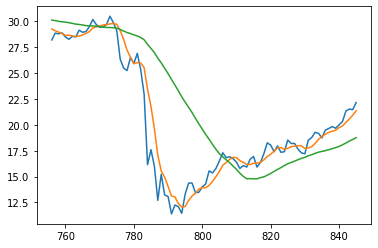

VALE3F


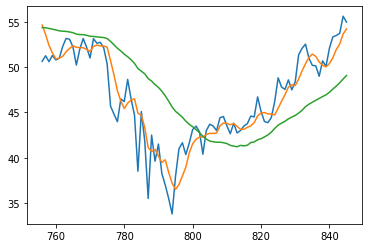

ITUB4F


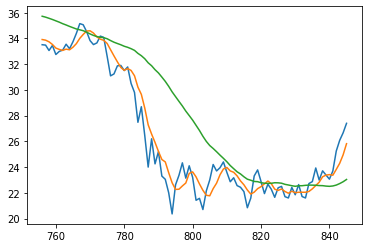

BBDC4F


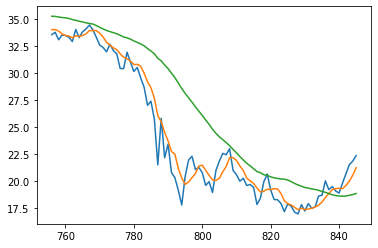

ABEV3F


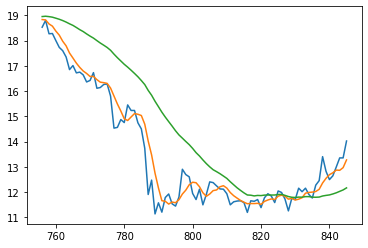

PETR3F


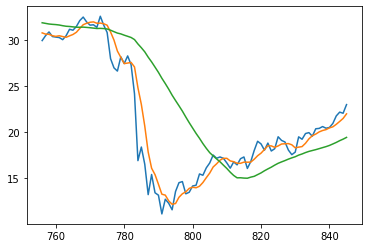

B3SA3F


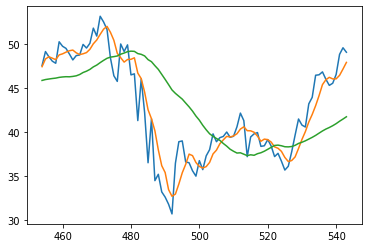

ITSA4F


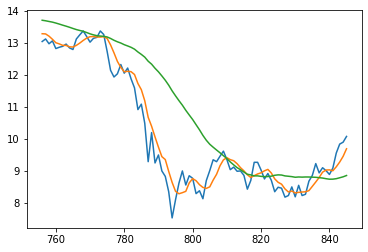

SMAL11F


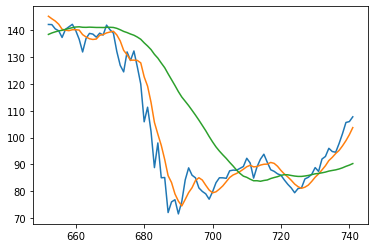

MGLU3F


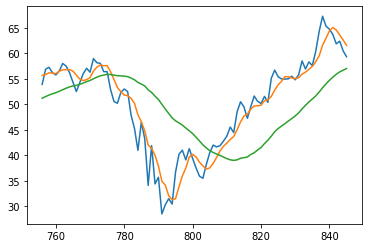

RENT3F


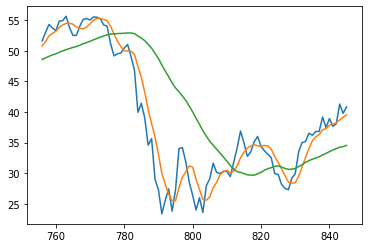

CMIG4F


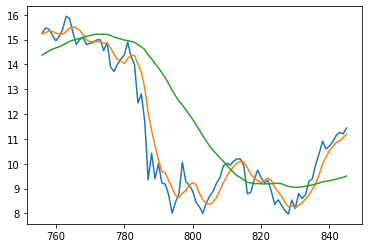

BOVA11F


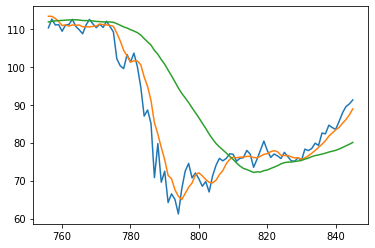

GGBR4F


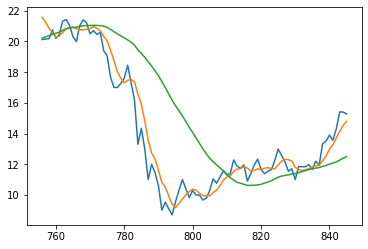

BPAC11F


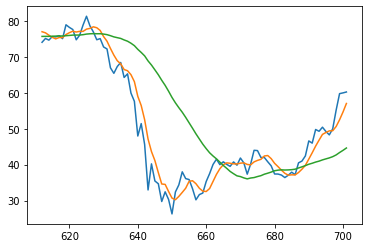

VVAR3F


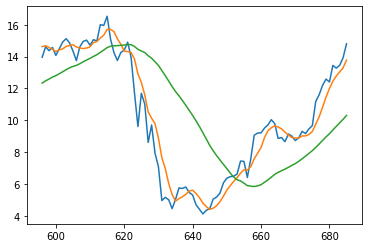

OIBR3F


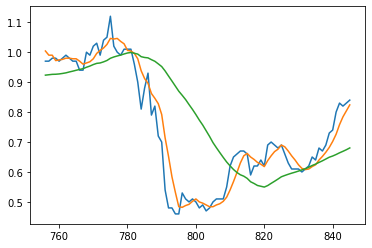

USIM5F


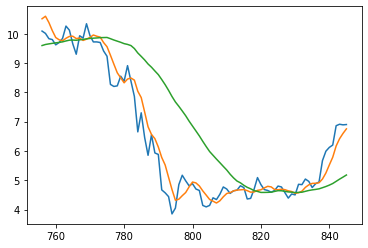

EMBR3F


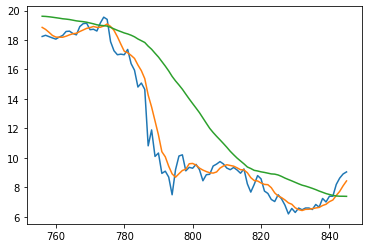

CIEL3F


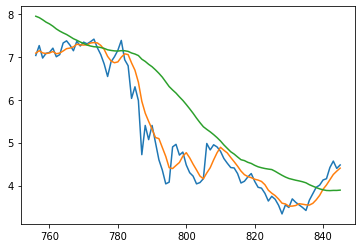

AZUL4F


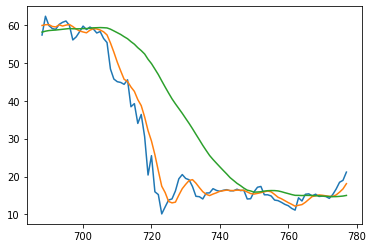

IRBR3F


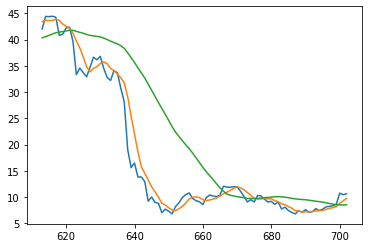

GOLL4F


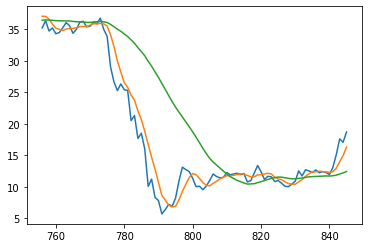

GOAU4F


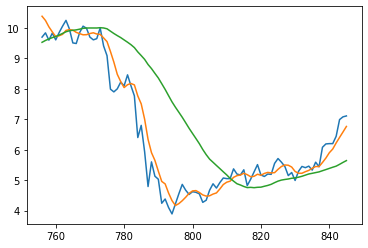

TCSA3F


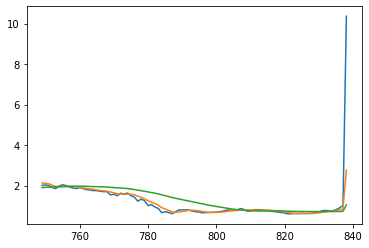

CVCB3F


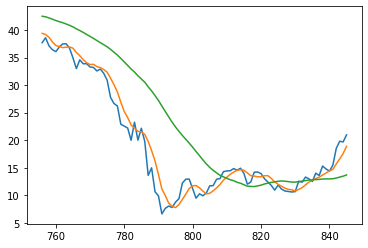

BBDC3F


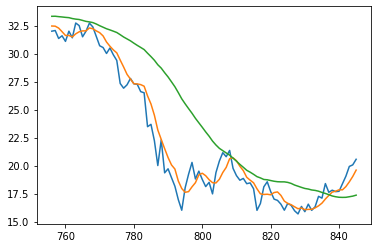

MEAL3F


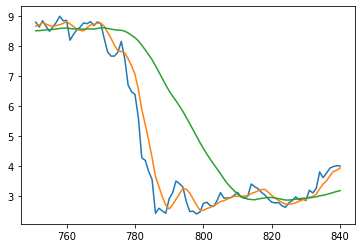

UGPA3F


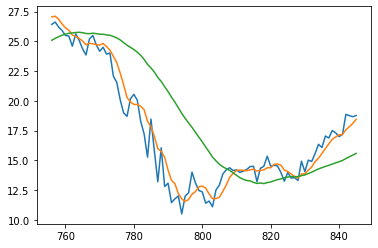

MRFG3F


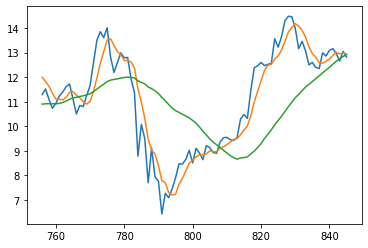

LREN3F


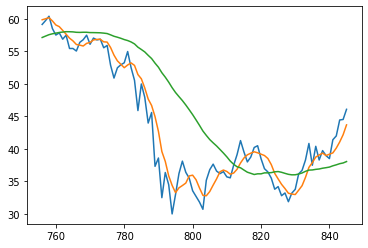

AMAR3F


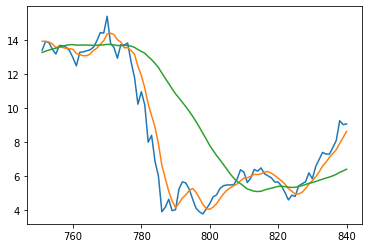

BPAN4F


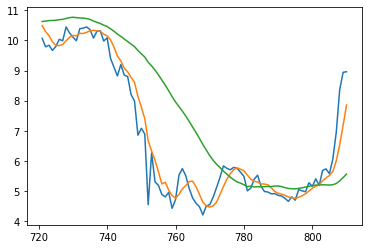

TIMP3F


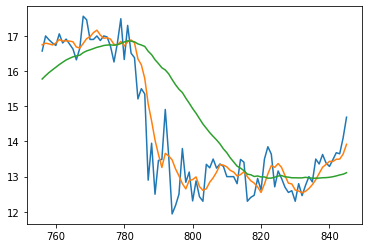

BEEF3F


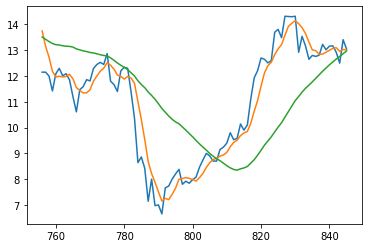

In [9]:
## Preço das ações nos últimos 90 pregões

for i in buy:
    print(i)
    cotahist.query("codneg=='{}'".format(i)).reset_index(drop=True)['preult'][50:][-90:].plot()
    cotahist.query("codneg=='{}'".format(i)).reset_index(drop=True)['preult'].rolling(5).mean()[-90:].plot()
    cotahist.query("codneg=='{}'".format(i)).reset_index(drop=True)['preult'].rolling(30).mean()[-90:].plot()
    plt.show()